In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE

# 1. Load dataset
df = pd.read_csv(r"C:\Users\sariy\Downloads\creditcard.csv")

# 2. Separate features and target
X = df.drop('Class', axis=1).values
y = df['Class'].values

# 3. Check class distribution
print("Original class distribution:", np.bincount(y))  # [Normal, Fraud]

# 4. Train-test split with stratification to ensure both classes appear in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)
print("Training set shape:", X_train.shape, y_train.shape)

# 5. Apply SMOTE to balance the training data
sm = SMOTE(random_state=2)
X_sm, y_sm = sm.fit_resample(X_train, y_train)
print("After SMOTE:", X_sm.shape, y_sm.shape)
print("SMOTE class distribution:", np.bincount(y_sm))  # Should now be balanced

# 6. Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_sm, y_sm)

# 7. Predict on test set
y_logreg = logreg.predict(X_test)
y_logreg_prob = logreg.predict_proba(X_test)[:, 1]

# 8. Evaluate performance
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_logreg))
print("Accuracy:", metrics.accuracy_score(y_test, y_logreg))
print("Precision:", metrics.precision_score(y_test, y_logreg))
print("Recall:", metrics.recall_score(y_test, y_logreg))
auc = metrics.roc_auc_score(y_test, y_logreg_prob)
print("AUC Score:", auc)

# 9. Plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_logreg_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Original class distribution: [199]
Training set shape: (149, 30) (149,)


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [5]:
!pip install imbalanced-learn


In [18]:
#K Nearest Neighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from collections import Counter

# 1. Load dataset
df = pd.read_csv(r"C:\Users\sariy\Downloads\creditcard.csv")

# 2. Separate features and target
X = df.drop('Class', axis=1).values
y = df['Class'].values

# 3. Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify=y
)



# Check class distribution in y_train before SMOTE
print("y_train class distribution before SMOTE:", Counter(y_train))

if len(np.unique(y_train)) > 1:
    sm = SMOTE(random_state=2)
    X_sm, y_sm = sm.fit_resample(X_train, y_train)
    print("After SMOTE:", Counter(y_sm))
else:
    print("Cannot apply SMOTE: y_train contains only one class.")
    # Use original data without SMOTE
    X_sm, y_sm = X_train, y_train

# 4. Apply SMOTE


# 5. Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_sm, y_sm)

# 6. Predict and get probabilities
y_knn = knn.predict(X_test)

if len(knn.classes_) > 1:
    y_knn_prob = knn.predict_proba(X_test)[:, 1]
else:
    # All predictions are of a single class, so set probability manually
    y_knn_prob = np.zeros_like(y_test)  # or np.ones_like if only class 1

# 7. Evaluation metrics
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_knn))
print("Accuracy:", metrics.accuracy_score(y_test, y_knn))
print("Precision:", metrics.precision_score(y_test, y_knn))
print("Recall:", metrics.recall_score(y_test, y_knn))


# Check if both classes are present in y_test
if len(np.unique(y_test)) > 1:
    auc_knn = metrics.roc_auc_score(y_test, y_knn_prob)
    print("AUC Score:", auc_knn)

    # Plot ROC Curve
    fpr, tpr, _ = metrics.roc_curve(y_test, y_knn_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % auc_knn)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('ROC Curve - KNN')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()
else:
    print("ROC AUC not available — only one class present in y_test:", np.unique(y_test))



y_train class distribution before SMOTE: Counter({np.int64(0): 179})
Cannot apply SMOTE: y_train contains only one class.
Confusion Matrix:
 [[20]]
Accuracy: 1.0
Precision: 0.0
Recall: 0.0
ROC AUC not available — only one class present in y_test: [0]


c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model was trained on only one class: [0]
Confusion Matrix:
 [[20]]
Accuracy:
 1.0
Precision:
 0.0
Recall:
 0.0
ROC AUC score is not defined: Only one class present in model or test data.
ROC Curve cannot be plotted. Only one class present in data.


c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sariy\AppData\Lo

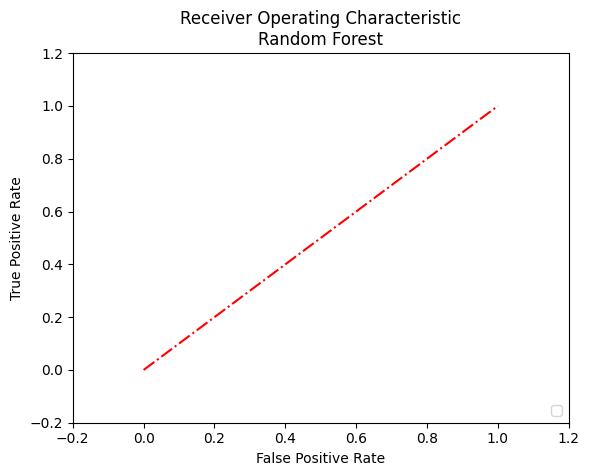

In [23]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf=RandomForestClassifier(random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)


if len(rf.classes_) > 1:
    y_rf_prob = rf.predict_proba(X_test)[:, 1]
else:
    print(f"Model was trained on only one class: {rf.classes_}")
    y_rf_prob = np.zeros_like(y_test)  # or use 0.5 if you want neutral prob


#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))



# Check if model was trained on both classes
if len(rf.classes_) > 1 and len(np.unique(y_test)) > 1:
    y_rf_prob = rf.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_rf_prob)
    print("AUC:\n", auc_score)
else:
    print("ROC AUC score is not defined: Only one class present in model or test data.")



#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)


from sklearn.metrics import roc_curve, roc_auc_score

# Check for valid input before plotting
if len(rf.classes_) > 1 and len(np.unique(y_test)) > 1:
    y_rf_prob = rf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_rf_prob)
    auc = roc_auc_score(y_test, y_rf_prob)
    
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC Curve cannot be plotted. Only one class present in data.")

plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Only one class found in training. Using constant probabilities.
Confusion Matrix:
 [[20]]
Accuracy:
 1.0
Precision:
 0.0
Recall:
 0.0
AUC score is undefined: only one class present in y_test.
Cannot plot ROC curve: only one class present in y_test.


c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sariy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sariy\AppData\Lo

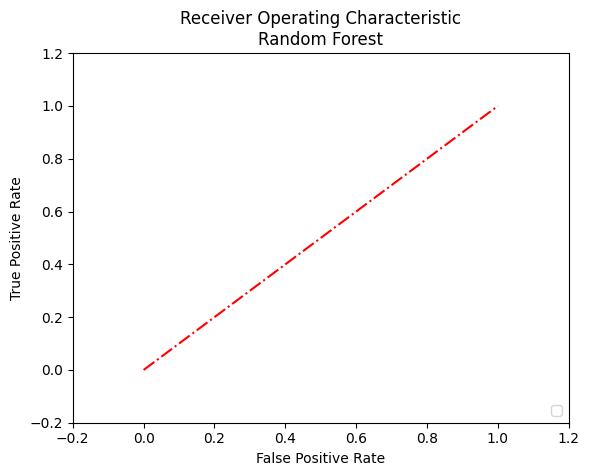

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(criterion='entropy',random_state=3)
rf.fit(X_sm,y_sm)
y_rf=rf.predict(X_test)


if len(rf.classes_) > 1:
    y_rf_prob = rf.predict_proba(X_test)[:, 1]
else:
    # Only one class predicted, assign constant probability
    y_rf_prob = np.zeros_like(y_test)  # or np.ones_like(y_test), depending on the class
    print("Only one class found in training. Using constant probabilities.")


#Performance metrics evaluation
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test,y_rf))
print("Accuracy:\n",metrics.accuracy_score(y_test,y_rf))
print("Precision:\n",metrics.precision_score(y_test,y_rf))
print("Recall:\n",metrics.recall_score(y_test,y_rf))


import numpy as np
from sklearn import metrics

if len(np.unique(y_test)) == 2:
    auc = metrics.roc_auc_score(y_test, y_rf_prob)
    print("AUC:", auc)
else:
    print("AUC score is undefined: only one class present in y_test.")


#plotting the ROC curve
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_rf_prob)


from sklearn.metrics import roc_curve, roc_auc_score

# Check if both classes are present in y_test
if len(np.unique(y_test)) == 2:
    y_rf_prob = rf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_rf_prob)
    auc = roc_auc_score(y_test, y_rf_prob)

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
else:
    print("Cannot plot ROC curve: only one class present in y_test.")

plt.plot([0,1],[0,1],'r-.')
plt.xlim([-0.2,1.2])
plt.ylim([-0.2,1.2])
plt.title('Receiver Operating Characteristic\nRandom Forest')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
